Reference - https://www.kaggle.com/samratp/predict-show-noshow-eda-visualization-model

In [1]:
pwd

'C:\\Users\\kjh96\\OneDrive\\Desktop\\Github\\kaggle\\Medical Appointment No Shows'

In [2]:
cd C://Users//kjh96//OneDrive//Desktop/Github/data

C:\Users\kjh96\OneDrive\Desktop\Github\data


In [3]:
ls

 C 드라이브의 볼륨: Windows10
 볼륨 일련 번호: 96C5-6AC9

 C:\Users\kjh96\OneDrive\Desktop\Github\data 디렉터리

2020-06-25  오후 06:45    <DIR>          .
2020-06-25  오후 06:45    <DIR>          ..
2020-05-31  오후 12:56    <DIR>          [Project] MomQ
2020-05-14  오후 06:16         8,143,183 geodata.geojson
2020-06-24  오전 10:32           793,240 K_health.xlsx
2019-09-20  오전 07:44        10,739,535 KaggleV2-May-2016.csv
2020-05-16  오후 09:46    <DIR>          movielens-small
2020-05-07  오후 09:02         3,698,624 ScreenToGif.exe
2020-05-16  오후 09:05    <DIR>          the-movies-dataset
2020-05-13  오후 05:32         2,705,813 Track6_Session2_간단한+Python+코드만으로+높은+성능의+기계+학습+모델+만들기.pdf
2020-05-23  오전 01:25    <DIR>          공모전
2020-05-23  오전 12:34    <DIR>          맘큐_최종
2020-05-23  오후 08:42    <DIR>          추천시스템 공식
               5개 파일          26,080,395 바이트
               8개 디렉터리  15,300,894,720 바이트 남음


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('./KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
df['PatientId'] = df['PatientId'].astype('int64')

In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [9]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [10]:
df.columns.ravel()

array(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMSReceived', 'NoShow'], dtype=object)

# Feature Engineering

In [11]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [13]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
df.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMSReceived                int64
NoShow                    object
dtype: object

In [15]:
df['Scholarship'] = df['Scholarship'].astype('object')
df['Hypertension'] = df['Hypertension'].astype('object')
df['Diabetes'] = df['Diabetes'].astype('object')
df['Alcoholism'] = df['Alcoholism'].astype('object')
df['Handicap'] = df['Handicap'].astype('object')
df['SMSReceived'] = df['SMSReceived'].astype('object')

In [16]:
df.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship               object
Hypertension              object
Diabetes                  object
Alcoholism                object
Handicap                  object
SMSReceived               object
NoShow                    object
dtype: object

In [17]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
np.sort(df['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [19]:
df[df['Age'] == -1].shape

(1, 12)

In [20]:
df[df['Age'] == 0].shape

(3539, 12)

In [21]:
df = df[df['Age'] >= 0]

In [22]:
df.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship               object
Hypertension              object
Diabetes                  object
Alcoholism                object
Handicap                  object
SMSReceived               object
NoShow                    object
dtype: object

In [23]:
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow


In [24]:
np.sort(df['ScheduledDay'].dt.strftime('%Y-%m-%d').unique())

array(['2015-11-10', '2015-12-03', '2015-12-07', '2015-12-08',
       '2015-12-14', '2015-12-15', '2016-01-04', '2016-01-05',
       '2016-01-07', '2016-01-11', '2016-01-13', '2016-01-14',
       '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22',
       '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
       '2016-01-29', '2016-02-01', '2016-02-02', '2016-02-03',
       '2016-02-04', '2016-02-05', '2016-02-11', '2016-02-12',
       '2016-02-15', '2016-02-16', '2016-02-17', '2016-02-18',
       '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24',
       '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-01',
       '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-05',
       '2016-03-07', '2016-03-08', '2016-03-09', '2016-03-10',
       '2016-03-11', '2016-03-14', '2016-03-15', '2016-03-16',
       '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-21',
       '2016-03-22', '2016-03-23', '2016-03-28', '2016-03-29',
       '2016-03-30', '2016-03-31', '2016-04-01', '2016-

In [25]:
np.sort(df['AppointmentDay'].dt.strftime('%Y-%m-%d').unique())

array(['2016-04-29', '2016-05-02', '2016-05-03', '2016-05-04',
       '2016-05-05', '2016-05-06', '2016-05-09', '2016-05-10',
       '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-14',
       '2016-05-16', '2016-05-17', '2016-05-18', '2016-05-19',
       '2016-05-20', '2016-05-24', '2016-05-25', '2016-05-30',
       '2016-05-31', '2016-06-01', '2016-06-02', '2016-06-03',
       '2016-06-06', '2016-06-07', '2016-06-08'], dtype=object)

In [26]:
df['ScheduledDay_DOW'] = df['ScheduledDay'].dt.weekday

C:\Users\kjh96\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.weekday

C:\Users\kjh96\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


In [29]:
df['AppointmentDay'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])

C:\Users\kjh96\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,2,1
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,2,1


In [31]:
df['Waiting_Time_days'] = (df['AppointmentDay'] - df["ScheduledDay"]).dt.days

C:\Users\kjh96\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Visualization

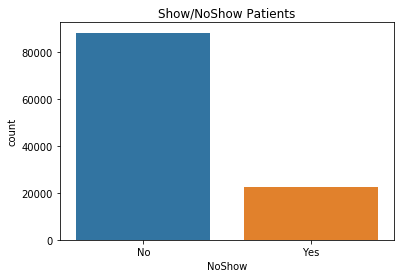

In [32]:
ax = sns.countplot(x=df.NoShow, data = df)
ax.set_title("Show/NoShow Patients")
plt.show()

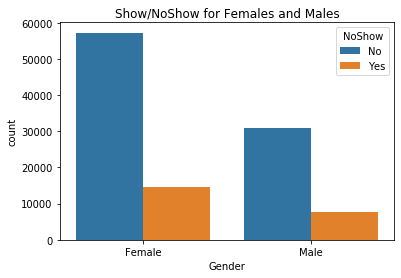

In [33]:
ax = sns.countplot(x=df.Gender,hue= df.NoShow, data = df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels = ['Female','Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text xticklabel objects>)

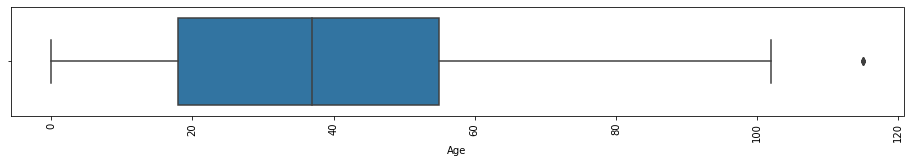

In [34]:
plt.figure(figsize=(16,2))
sns.boxplot(x=df.Age)
plt.xticks(rotation=90)

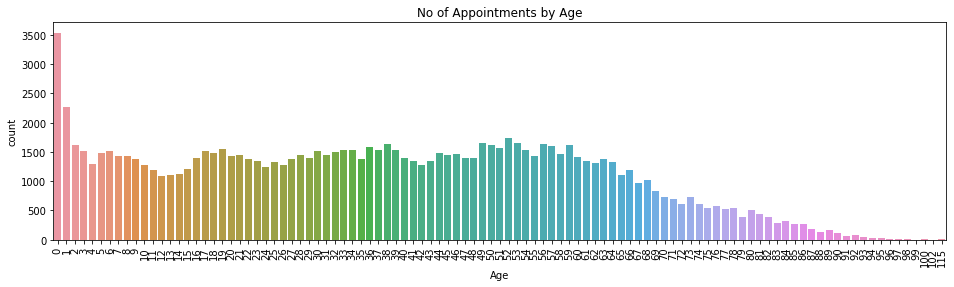

In [35]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("No of Appointments by Age")
plt.show()

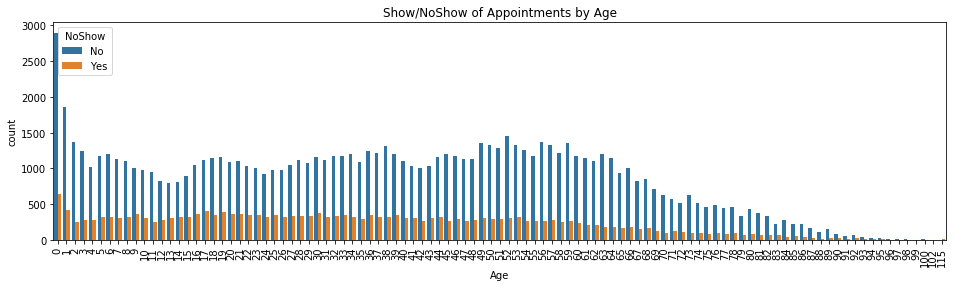

In [36]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age, hue=df.NoShow)
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()

In [37]:
# df_age_ratio = 
df_age_ratio = df[df.NoShow == "No"].groupby(['Age']).size()/df.groupby(['Age']).size()

In [38]:
df_age_ratio

Age
0      0.819441
1      0.817422
2      0.844252
3      0.816920
4      0.782910
         ...   
98     0.833333
99     1.000000
100    1.000000
102    1.000000
115    0.400000
Length: 103, dtype: float64

In [39]:
df_age_ratio.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
           dtype='int64', name='Age', length=103)

In [40]:
df_age_ratio.values

array([0.81944052, 0.81742191, 0.84425216, 0.81692003, 0.78290993,
       0.78509066, 0.79224195, 0.78906797, 0.77668539, 0.73469388,
       0.76138148, 0.79330544, 0.75091575, 0.72529465, 0.71735242,
       0.73410405, 0.74821683, 0.73757455, 0.76462677, 0.74498382,
       0.75295755, 0.75550964, 0.74491279, 0.74573758, 0.74154589,
       0.73573574, 0.75681995, 0.7610748 , 0.77071823, 0.76478974,
       0.75739645, 0.77762335, 0.78006645, 0.77165354, 0.78899083,
       0.79027576, 0.78227848, 0.79321592, 0.80356047, 0.77864583,
       0.7853067 , 0.77117385, 0.79166667, 0.77008929, 0.78278413,
       0.82450103, 0.80616438, 0.80846485, 0.80629021, 0.81961259,
       0.81959082, 0.81940013, 0.82989691, 0.80678377, 0.8248366 ,
       0.81964912, 0.83914373, 0.82657517, 0.827774  , 0.83559113,
       0.83274274, 0.85107967, 0.83841463, 0.86972344, 0.86326071,
       0.84831971, 0.84919966, 0.84789311, 0.83300395, 0.85817308,
       0.87016575, 0.82589928, 0.83577236, 0.86758621, 0.85215

Text(0.5, 1.0, 'Percentage of Patients that showed up by age')

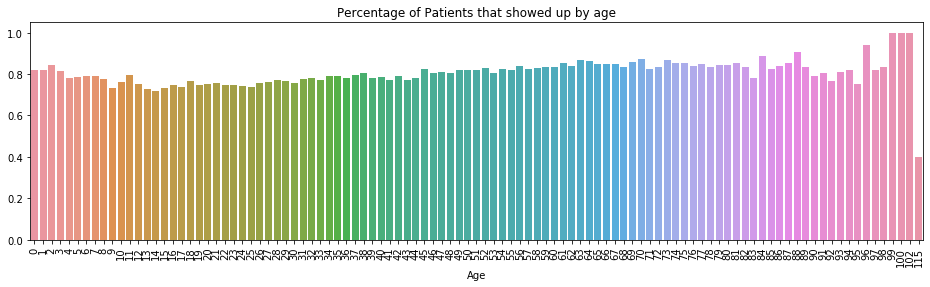

In [41]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio)
ax.set_title("Percentage of Patients that showed up by age")

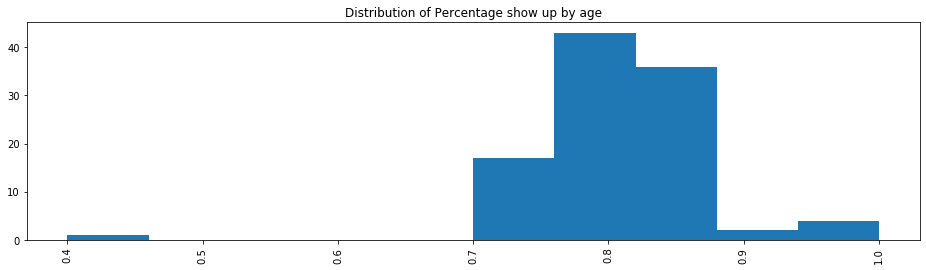

In [42]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = plt.hist(df_age_ratio)
plt.title("Distribution of Percentage show up by age")
plt.show()

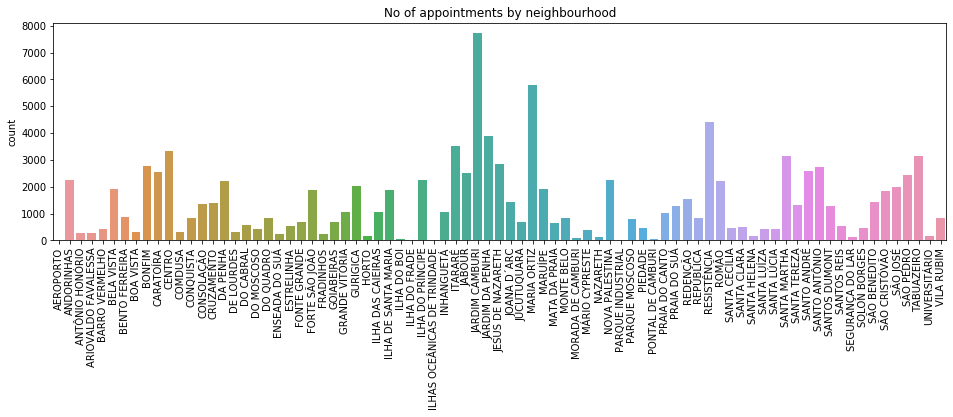

In [43]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("No of appointments by neighbourhood")
plt.show()

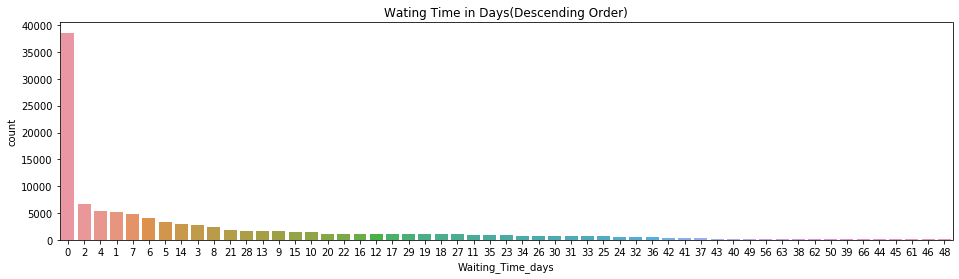

In [44]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order = df.Waiting_Time_days.value_counts().iloc[:55].index)
ax.set_title("Wating Time in Days(Descending Order)")
plt.show()

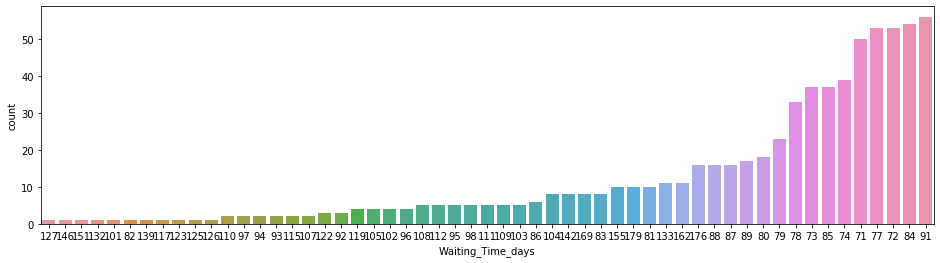

In [45]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order = df.Waiting_Time_days.value_counts(ascending=True).iloc[:55].index)

# Modeling

In [46]:
le = LabelEncoder()

In [47]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
#Neighbourhood
le = LabelEncoder()
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])
#ScheduledDay_DOW
le = LabelEncoder()
df['ScheduledDay_DOW'] = le.fit_transform(df['ScheduledDay_DOW'])
#AppointmentDay_DOW
le = LabelEncoder()
df['AppointmentDay_DOW'] = le.fit_transform(df['AppointmentDay_DOW'])

le = LabelEncoder()
df['NoShow'] = le.fit_transform(df['NoShow'])

C:\Users\kjh96\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kjh96\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kjh96\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [48]:
df['ScheduledDay_Y'] = df['ScheduledDay'].dt.year
df['ScheduledDay_M'] = df['ScheduledDay'].dt.month
df['ScheduledDay_D'] = df['ScheduledDay'].dt.day
df.drop(['ScheduledDay'], axis=1, inplace=True)

df['AppointmentDay_Y'] = df['AppointmentDay'].dt.year
df['AppointmentDay_M'] = df['AppointmentDay'].dt.month
df['AppointmentDay_D'] = df['AppointmentDay'].dt.day
df.drop(['AppointmentDay'], axis=1, inplace=True)

C:\Users\kjh96\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kjh96\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kjh96\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [49]:
df.sample(n=10)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
90697,0,23,13,0,0,0,0,0,0,0,3,3,0,2016,6,2,2016,6,2
70649,0,62,55,0,0,0,0,0,1,0,4,0,17,2016,5,13,2016,5,30
457,0,20,75,0,0,0,0,0,0,0,0,4,11,2016,4,18,2016,4,29
53279,1,17,1,0,0,0,0,0,0,0,4,4,0,2016,5,20,2016,5,20
10597,1,37,14,0,1,1,0,0,0,0,1,1,0,2016,5,10,2016,5,10
83404,0,50,38,0,0,0,0,0,1,0,1,3,9,2016,4,26,2016,5,5
23863,1,41,9,0,0,0,0,0,0,0,3,3,0,2016,5,19,2016,5,19
58610,1,8,26,0,0,0,0,0,1,0,2,1,34,2016,4,20,2016,5,24
35882,0,29,8,0,0,0,0,0,1,0,4,1,11,2016,5,20,2016,5,31
2432,1,5,69,0,0,0,0,0,0,0,4,4,0,2016,4,29,2016,4,29


In [50]:
X = df.drop(['NoShow'], axis=1)
y = df["NoShow"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [52]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [53]:
for name, importance in zip(X.columns, np.sort(dt_clf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

Gender -- 0.23
Age -- 0.23
Neighbourhood -- 0.17
Scholarship -- 0.08
Hypertension -- 0.07
Diabetes -- 0.05
Alcoholism -- 0.04
Handicap -- 0.04
SMSReceived -- 0.02
ScheduledDay_DOW -- 0.02
AppointmentDay_DOW -- 0.01
Waiting_Time_days -- 0.01
ScheduledDay_Y -- 0.01
ScheduledDay_M -- 0.01
ScheduledDay_D -- 0.01
AppointmentDay_Y -- 0.01
AppointmentDay_M -- 0.00
AppointmentDay_D -- 0.00


In [54]:
dt_clf.score(X_test, y_test)

0.7242693425453748

In [55]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
# https://blog.wonkyunglee.io/3

print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(rf_clf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

Feature Importance:

Gender -- 0.29
Age -- 0.25
Neighbourhood -- 0.14
Scholarship -- 0.06
Hypertension -- 0.06
Diabetes -- 0.04
Alcoholism -- 0.04
Handicap -- 0.03
SMSReceived -- 0.02
ScheduledDay_DOW -- 0.02
AppointmentDay_DOW -- 0.01
Waiting_Time_days -- 0.01
ScheduledDay_Y -- 0.01
ScheduledDay_M -- 0.01
ScheduledDay_D -- 0.01
AppointmentDay_Y -- 0.01
AppointmentDay_M -- 0.00
AppointmentDay_D -- 0.00


In [57]:
rf_clf.score(X_test, y_test)

0.783736360146954

In [59]:
params={'n_estimators':[10,20], 'max_depth':[None, 5], 'min_samples_split':[2,3]}
rf_clf = RandomForestClassifier(random_state=0)
clf_grid = GridSearchCV(rf_clf, params, cv=5, n_jobs=-1, verbose=1)
clf_grid.fit(X, y)
print(clf_grid.best_params_)
print(clf_grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   57.4s finished


{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
0.7980656135365387
